## Battle Of Neighborhoods - IBM Data Science Professioal Capstone
## Restaurant Location - Recommender System

### Introduction 

An entrepreneur needs to open a new Mexican restaurant in Manhattan, New York City.This vendor does not have any idea for choosing the location which is economic and profitable to them. So I am here analysing the data and help them to choose the right place.

In [1]:
# Import all the necessary libraries
import numpy as np 
import pandas as pd
import json # for JSON files
from geopy.geocoders import Nominatim  # convert an address into latitude and longitude values
import requests 
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')


Libraries imported.


#### Download the NewYork City data from https://cocl.us/new_york_dataset
#### Save it as 'newyorkgeo.json'

In [2]:
with open('newyorkgeo.json') as json_data:
    newyorkCity_data = json.load(json_data)
newyorkCity_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [3]:
neighborhoods_data = newyorkCity_data['features']

### Transform the data

Load the data from dictionary into pandas dataframe. Also label the necessaru columns and append the data to the dataframe

In [4]:
# define the pandas dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# Assign columns to a empty dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

### Filtering data  'borough - Manhattan'

In [5]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


### Geocoder
Find the location details - latitude & longitude on Manhattan City using geocoder

In [6]:
address = 'Manhattan, NY'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

C:\Users\aparn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


### creating a map of Manhattan using latitude and longitude values

In [7]:
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### FourSquare API Credentials 

In [8]:
CLIENT_ID = '' 
CLIENT_SECRET = ''
VERSION = ''
LIMIT=100

In [9]:
search_query = 'Mexican'
radius = 500

In [10]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}\
&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,\
                                                                    latitude, longitude, VERSION, search_query, radius, LIMIT)

In [11]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef8a456e0d74740ce8f2296'},
 'response': {'venues': []}}

In [12]:
# category id - 4bf58dd8d48988d1c1941735 - Most of the mexican restaurants having this category id.

create url to find Mexican Restaurants using category id

In [13]:
LIMIT = 100
radius = 500
categoryId = '4bf58dd8d48988d1c1941735'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,  radius, LIMIT,categoryId)


In [14]:
def getNearbyLoc(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION,  radius, LIMIT,categoryId)

        
        results = requests.get(url).json()["response"]['venues']
        
        venues_list.append([(
            name,
            v['id'],
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],
            v['categories'][0]['name'])for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Id',          
                  'Name', 
                  'Latitude', 
                  'Longitude',
                  'Category']
    
    return(nearby_venues)

In [15]:
manhattan_neigh_loc = getNearbyLoc(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [16]:
manhattan_neigh_loc.head(10)

,Neighborhood,Id,Name,Latitude,Longitude,Category
0,Marble Hill,5bd90c33a35dce002c1e26fc,Taqueria Sinaloense,40.874574,-73.910687,Mexican Restaurant
1,Marble Hill,5217dd2811d2d06ccafb77d3,Estrellita Poblana V,40.879687,-73.906257,Mexican Restaurant
2,Marble Hill,59fbb1cd1bc7043d43ffbf64,Guacamole,40.874511,-73.910708,Mexican Restaurant
3,Marble Hill,5b06e46035811b00393375b1,Amor Eterno,40.880898,-73.908693,Mexican Restaurant
4,Chinatown,5885471a0037eb3b6c2973d2,Factory Tamal,40.715876,-73.990467,Mexican Restaurant
5,Chinatown,566e0447498ef1f999f5e2fb,Taco Recipes,40.715387,-73.989864,Taco Place
6,Chinatown,5ccdbc290e3239002bad823e,Casa Bocado,40.719565,-73.994482,Mexican Restaurant
7,Chinatown,5455ad55498ea5abf9f04f38,Palqueria,40.714458,-73.998256,Mexican Restaurant
8,Chinatown,528d3763498e3be0efe0d555,Breakroom,40.716656,-73.999722,Burger Joint
9,Chinatown,3fd66200f964a52022e41ee3,Barrio Chino,40.718069,-73.989975,Mexican Restaurant


In [17]:
manhattan_neigh_loc.tail(10)

,Neighborhood,Id,Name,Latitude,Longitude,Category
755,Flatiron,4e4c4d3bbd413c4cc6685833,Apollo,40.740972,-73.986897,Mexican Restaurant
756,Flatiron,58b89ffb084be5660147fd11,Dos Toros Taqueria,40.741482,-73.993792,Burrito Place
757,Flatiron,54ecd093498e334d282b64df,Javelina Tex-Mex,40.736738,-73.987508,Mexican Restaurant
758,Flatiron,55365d3f498e7a3f69209272,Mexicue Kitchen & Bar,40.743615,-73.987890,Mexican Restaurant
759,Hudson Yards,56984061498edabe54a5b963,Taqueria Diana,40.756616,-73.993937,Taco Place
760,Hudson Yards,4a81a139f964a52011f71fe3,Fresco Tortillas (Tex-Mexican Express),40.756969,-73.993647,Burrito Place
761,Hudson Yards,5d79351cafb4fb000802a02c,Cielito Lindo Cart,40.752545,-73.996412,Food Truck
762,Hudson Yards,5b245aa64a7aae002c414ae9,Kahlo,40.752340,-74.002614,Mexican Restaurant
763,Hudson Yards,4ae1f6c1f964a520338921e3,El Ranchito Del Agave,40.754969,-73.994810,Mexican Restaurant
764,Hudson Yards,4e6d4cc3d4c0af8b7901da6e,Fres'Co Tortillos,40.756992,-73.993560,Mexican Restaurant


### Find neighborhoods having most mexican restaurants

In [18]:
mexican_res_neigh=manhattan_neigh_loc[['Id','Neighborhood']].groupby('Neighborhood').count()
mexican_res_neigh = mexican_res_neigh.sort_values(by=['Id'], ascending=False)
mexican_res_neigh.reset_index(inplace=True)
mexican_res_neigh.columns = ['Neighborhood','count']
mexican_res_neigh

,Neighborhood,count
0,Noho,50
1,Flatiron,44
2,Midtown,40
3,Greenwich Village,39
4,West Village,36
5,Chelsea,34
6,Midtown South,33
7,Financial District,32
8,Murray Hill,31
9,East Harlem,28


### Neighborhood clustering using KMeans clustering

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [21]:
manhattan_venues.shape

(3156, 7)

In [22]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


### Data Preprocessing and Clustering

In [23]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Marble Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()

In [25]:
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Battery Park City,0.0,0.0,0.0,0.000000,0.015873,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.015873,0.0,0.0,0.000000
1,Carnegie Hill,0.0,0.0,0.0,0.000000,0.011494,0.0,0.0,0.0,0.011494,...,0.0,0.022989,0.0,0.0,0.0,0.011494,0.034483,0.0,0.0,0.034483
2,Central Harlem,0.0,0.0,0.0,0.066667,0.044444,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
3,Chelsea,0.0,0.0,0.0,0.000000,0.040000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.010000,0.010000,0.0,0.0,0.000000
4,Chinatown,0.0,0.0,0.0,0.000000,0.030000,0.0,0.0,0.0,0.000000,...,0.0,0.030000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.010000


In [26]:
# finding common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Coffee Shop,Gym,Memorial Site,Playground,Mexican Restaurant,Sandwich Place,Gourmet Shop,Shopping Mall
1,Carnegie Hill,Coffee Shop,Café,Italian Restaurant,Yoga Studio,Wine Shop,Bookstore,Gym / Fitness Center,Gym,Bar,Shipping Store
2,Central Harlem,African Restaurant,Bar,French Restaurant,American Restaurant,Gym / Fitness Center,Chinese Restaurant,Seafood Restaurant,Juice Bar,Public Art,Beer Bar
3,Chelsea,Coffee Shop,Art Gallery,Ice Cream Shop,American Restaurant,French Restaurant,Café,Italian Restaurant,Bar,Cupcake Shop,Cycle Studio
4,Chinatown,Chinese Restaurant,Bakery,Dessert Shop,American Restaurant,Ice Cream Shop,Spa,Bar,Hotpot Restaurant,Vietnamese Restaurant,Bubble Tea Shop


In [28]:
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 1, 0, 1, 1, 2, 0, 1])

In [29]:
manhattan_merged = manhattan_data

# add clustering labels
manhattan_merged['Cluster Labels'] = kmeans.labels_

# merge manhattan_merged with neighborhoods_venues_sorted to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Pharmacy,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Bakery,Dessert Shop,American Restaurant,Ice Cream Shop,Spa,Bar,Hotpot Restaurant,Vietnamese Restaurant,Bubble Tea Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Deli / Bodega,Mobile Phone Shop,Mexican Restaurant,Spanish Restaurant,Sandwich Place,Supermarket,Pizza Place,Tapas Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,1,Mexican Restaurant,Lounge,Restaurant,Café,Deli / Bodega,Bakery,Chinese Restaurant,Caribbean Restaurant,Park,Frozen Yogurt Shop
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Deli / Bodega,Coffee Shop,Café,Mexican Restaurant,Sushi Restaurant,Caribbean Restaurant,School,Sandwich Place,Bakery


### Adding cluster id to dataframe

In [30]:
manhattan_clusters=manhattan_merged[['Neighborhood','Cluster Labels']]

In [31]:
manhattan_clusters.head(10)

,Neighborhood,Cluster Labels
0,Marble Hill,1
1,Chinatown,1
2,Washington Heights,0
3,Inwood,1
4,Hamilton Heights,0
5,Manhattanville,1
6,Central Harlem,1
7,East Harlem,2
8,Upper East Side,0
9,Yorkville,1


### Disaply Mexican Restaurants Neighborhood

In [32]:
mexican_res_neigh

,Neighborhood,count
0,Noho,50
1,Flatiron,44
2,Midtown,40
3,Greenwich Village,39
4,West Village,36
5,Chelsea,34
6,Midtown South,33
7,Financial District,32
8,Murray Hill,31
9,East Harlem,28


In [33]:
# Merging clusters
mexican_res_cluster = pd.merge(mexican_res_neigh,manhattan_clusters,how='inner',on='Neighborhood')

In [34]:
mexican_res_cluster

,Neighborhood,count,Cluster Labels
0,Noho,50,3
1,Flatiron,44,3
2,Midtown,40,2
3,Greenwich Village,39,3
4,West Village,36,1
5,Chelsea,34,1
6,Midtown South,33,2
7,Financial District,32,3
8,Murray Hill,31,3
9,East Harlem,28,2


In [35]:
neigh_with_mexican_res = mexican_res_cluster[['Neighborhood','Cluster Labels']].groupby('Cluster Labels').count() 

In [36]:
neigh_with_mexican_res

,Neighborhood
Cluster Labels,
0,5
1,13
2,11
3,10
4,1


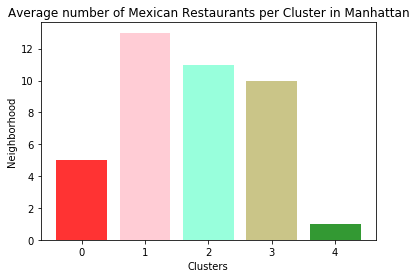

In [39]:
import matplotlib.pyplot as plt

objects = (0,1,2,3,4)
y_pos = np.arange(len(objects))
perf = neigh_with_mexican_res['Neighborhood']
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'pink','aquamarine', 'darkkhaki','green'])
plt.xticks(y_pos, objects)
plt.ylabel('Neighborhood')
plt.xlabel('Clusters')
plt.title('Average number of Mexican Restaurants per Cluster in Manhattan')
plt.show()

### Neighbourhood suitable for opening a Mexican resturant

#### Observations

Most of the Mexican Restaurants are in cluster 1 represented by the pink clusters.
Looking at the nearby clusters, the optimum place to put a new Mexican Restaurant is Cluster 4 
because in cluster 3 there is less mexican restaurants compared to cluster2 and cluster1.
There are many Neighborhoods in the area but less Mexican Restaurants therefore, eliminating any competition.  

In [40]:
#list all the neighborhoods in cluster 4
neigh_suited_for_opening_res = manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]
neigh_suited_for_opening_res['Neighborhood']

30    Carnegie Hill
Name: Neighborhood, dtype: object

 This concludes the optimal findings for this project and recommends the entrepreneur to open an authentic Mexican restaurant in these locations with little to no competition